Tarea 3 ML

Gabriel Pezoa 201673562-3

Alexander Ruz 201673613-1

In [1]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row


In [2]:
df

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,7.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,8.857143
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286,14.000000
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000,11.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667,15.714286


In [3]:
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

In [4]:
df

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,7.400000,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,7.166667,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,8.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,6.000000,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,7.000000,5,2013,1,0,0,0,1
5,7.000000,82.800000,1.480000,1018.000000,7.000000,6,2013,1,0,0,0,1
6,7.000000,78.600000,6.300000,1020.000000,8.857143,0,2013,1,0,0,0,1
7,8.857143,63.714286,7.142857,1018.714286,14.000000,1,2013,1,0,0,0,1
8,14.000000,51.250000,12.500000,1017.000000,11.000000,2,2013,1,0,0,0,1
9,11.000000,62.000000,7.400000,1015.666667,15.714286,3,2013,1,0,0,0,1


In [5]:
y = df.pop("y_value").values  
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

#X_val, y_val = shuffle(X_val, y_val, random_state = 0)

In [6]:
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape)

(1000, 11) (1000,) (461, 11) (461,)


Pregunta a)

El problema trata de predecir la temperatura media de cierto día, según cómo estuvo el día anterior a éste en India.

Se tienen 1461 datos, de los cuales 1000 se utilizarán para el conjunto de entrenamiento y el resto para el de validación. 

De los datos se puede obtener la temperatura media de un día desde el año 2013 al 2016 (con mes y número de día específicos),  el valor de humedad, la velocidad del viento y la presión media de ese día, además de saber en que estación del año se encuentra.

La matriz X train o val, de 1000 y 461 filas respectivamente y ambas de 11 columnas, donde cada columna representa lo siguiente:

meantemp, humidity, wind_speed, meanpressure, cday, year, month, season_fall, season_rainy, season_summer, season_winter.

Es decir:

Temperatura media, humedad, velocidad del viento, presión media, día (0:lunes, 1:martes, etc.), año, mes, otoñal, lluvioso, verano, invierno.

La matriz y train o val, de 1000 y 461 filas respectivamente y ambas de 1 columna (es decir son un vector), representar el valor de "y_value" de cada día, que corresponde a la temperatura media del día siguiente.




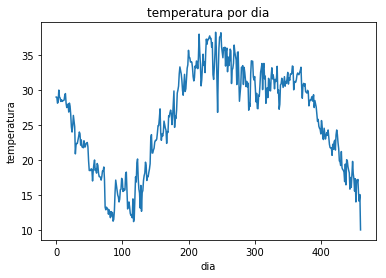

In [43]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(y_val)
plt.xlabel('dia')
plt.ylabel('temperatura')
plt.title('temperatura por dia')
plt.show()

Se decidió graficar y_val, ya que corresponden a menos datos y se observan mejor, además corresponden a 461 datos en total que es poco más de un año y se puede observar el comportamiento de la temperatura en un año.

Utilizar la información del día anterior, puede ayudar, por ejemplo si la velocidad del viento fue alta el día anterior, puede producir un movimiento de nubes más rápido hacia la zona y puede provocar una lluvia. Asímismo la temperatura media del día anterior debe ser similar o no variar demasiado respecto al día actual, siempre dependiendo de la estación del año en que se esté entre otros factores. Por lo que utilizar la información del día anterior es válido.

Pregunta b)

In [8]:
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)
... #define your regularized tree model



Ellipsis

In [9]:
Depths = np.arange(1, X_train.shape[1], 2 ) #choose steps   
SamplesS = np.arange(2, X_train.shape[0] , 200 ) #choose steps

models = []

for d in Depths:
    for s in SamplesS:
        model_reg = Tree()
        model_reg.set_params(max_depth = d, min_samples_split = s)
        model_reg.fit(X_train,y_train)
        models.append(model_reg)
        

#model_reg = Tree()  #depth (profundidad), split, min_samples_leaf
#model_reg.fit(X_train,y_train)


Se tiene el modelo no regularizado y 25 modelos regularizados con variaciones de parámetros de profundidad y de split.

Al utilizar el árbol de decisión no es necesario escalar los datos, ya que cada nodo del árbol divide sus datos en dos conjuntos, mientras se compara una característica que divide de mejor manera el conjunto de datos con un valor umbral (de referencia).

Pregunta c)

RMSE train=  0.0
RMSE val=  2.4848663448597272


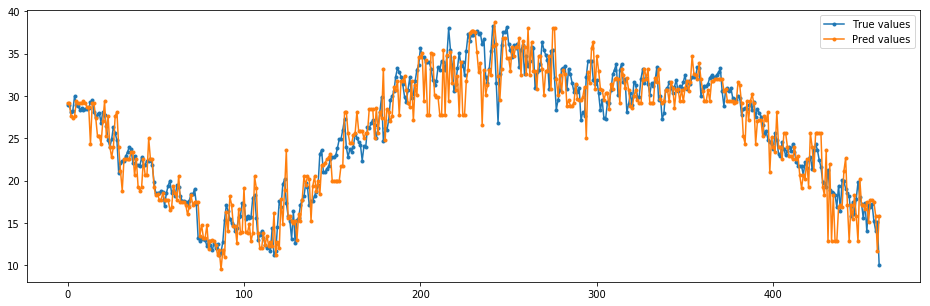

In [10]:
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()




RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


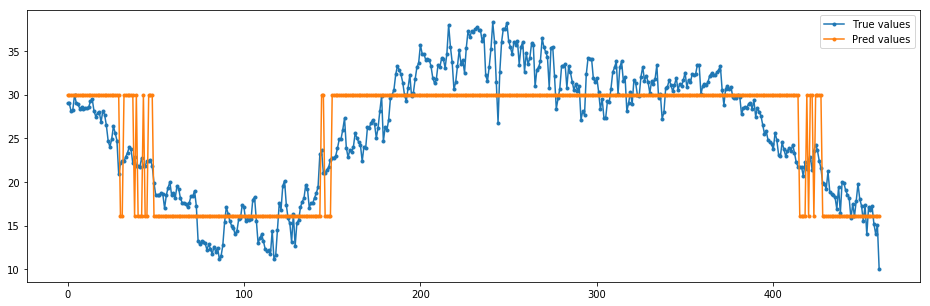

RMSE train=  3.567413761517928
RMSE val=  3.9221739709003955


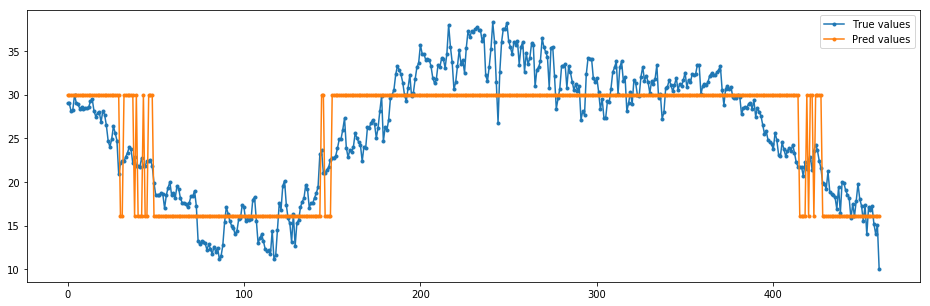

RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


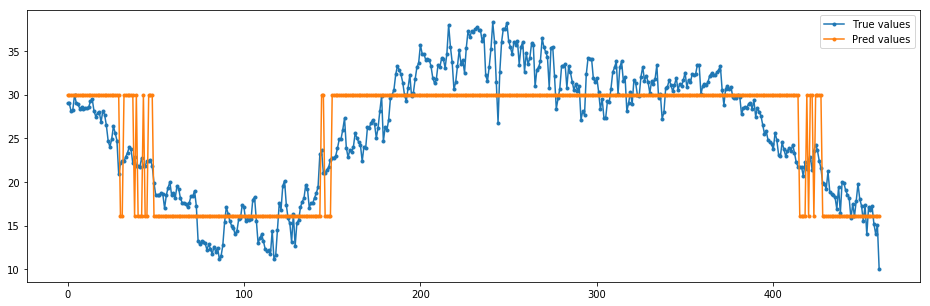

RMSE train=  3.567413761517928
RMSE val=  3.9221739709003964


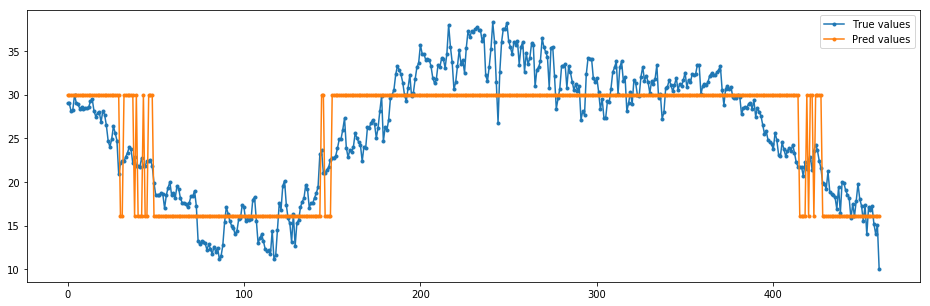

RMSE train=  3.567413761517928
RMSE val=  3.9221739709003955


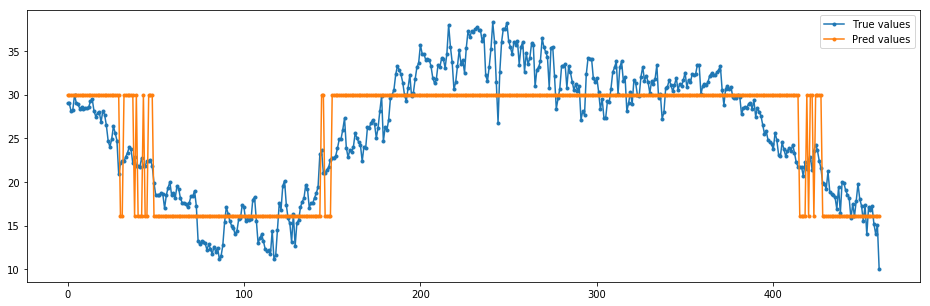

RMSE train=  1.8860218948939758
RMSE val=  1.8547383542194988


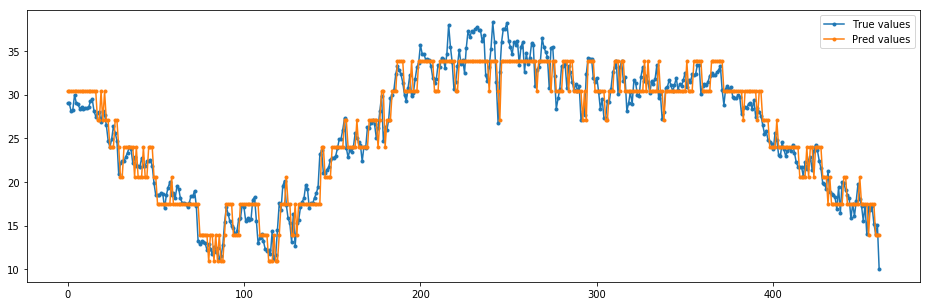

RMSE train=  2.1468638280736316
RMSE val=  2.1380012259195724


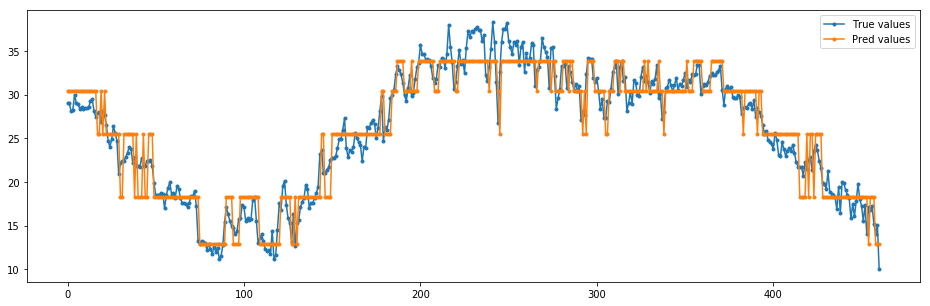

RMSE train=  2.6411258697150686
RMSE val=  2.542597343545757


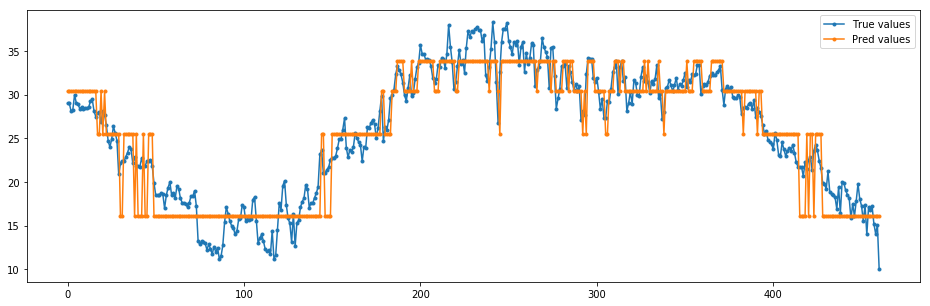

RMSE train=  2.8732430042395802
RMSE val=  2.8755162493817124


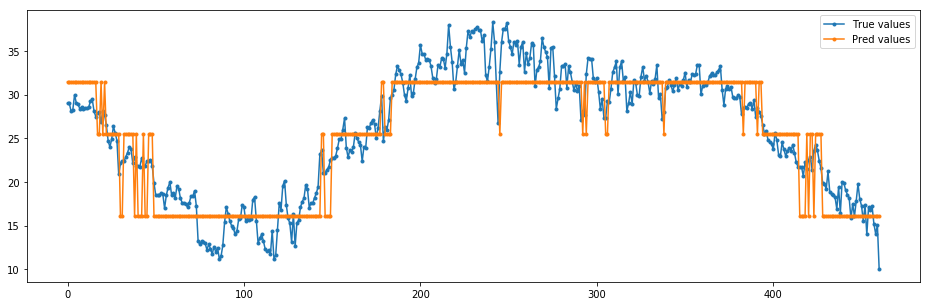

RMSE train=  3.567413761517928
RMSE val=  3.9221739709003955


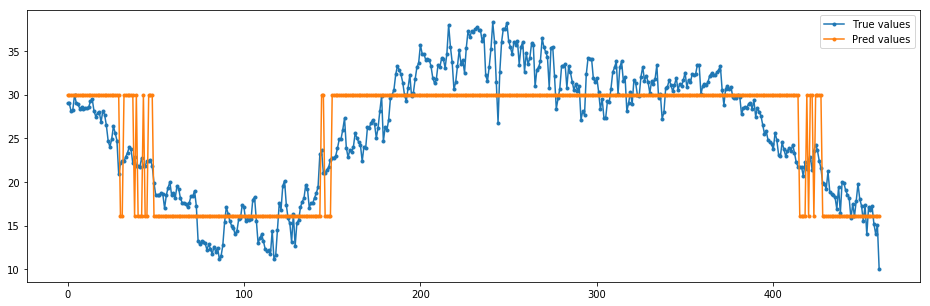

RMSE train=  1.5363107289102982
RMSE val=  1.7820346446862532


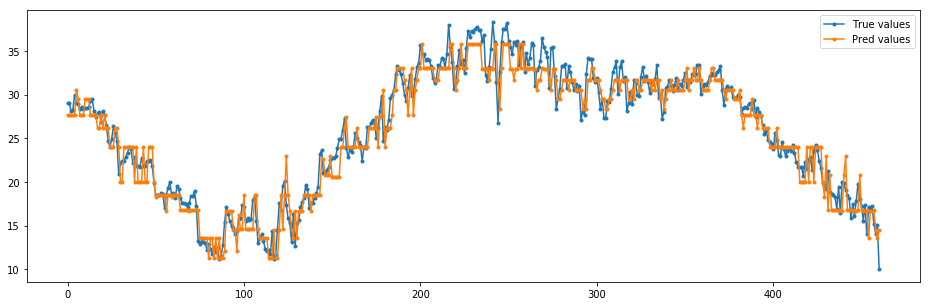

RMSE train=  2.0795329907238296
RMSE val=  2.080229589836194


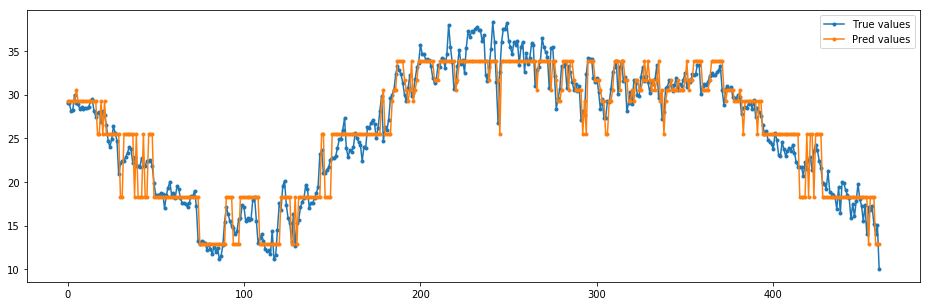

RMSE train=  2.641125869715068
RMSE val=  2.5425973435457565


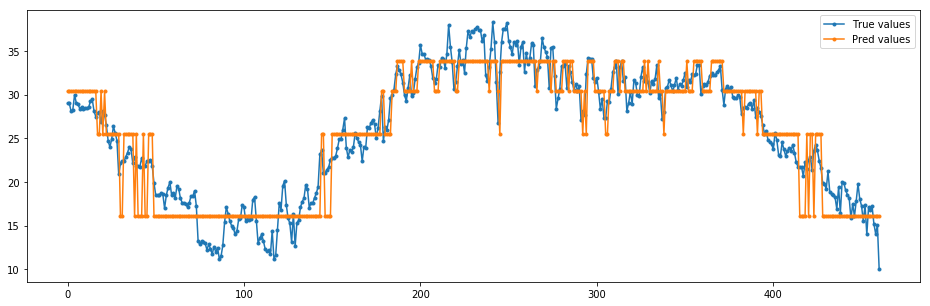

RMSE train=  2.8732430042395802
RMSE val=  2.875516249381712


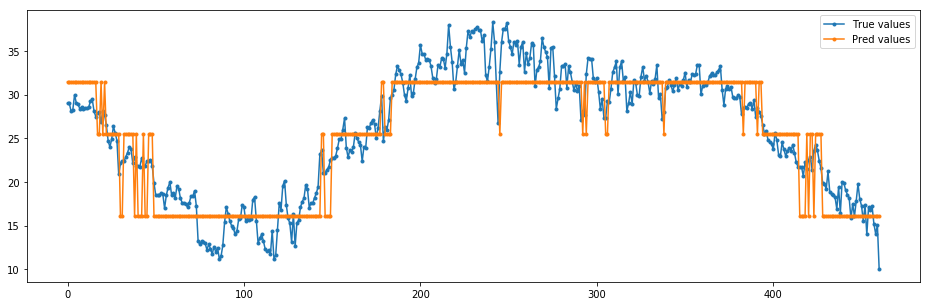

RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


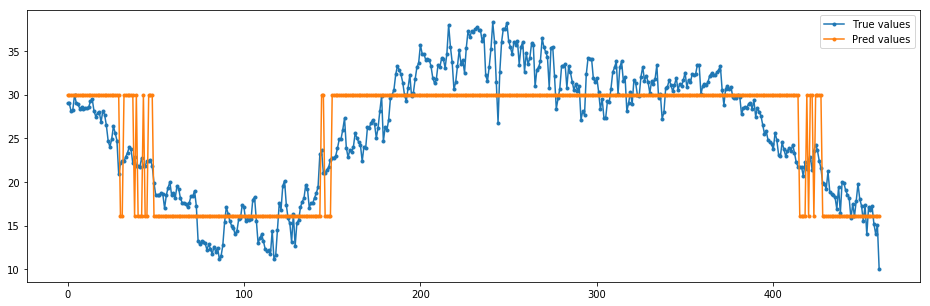

RMSE train=  1.278041670743795
RMSE val=  2.006881454113953


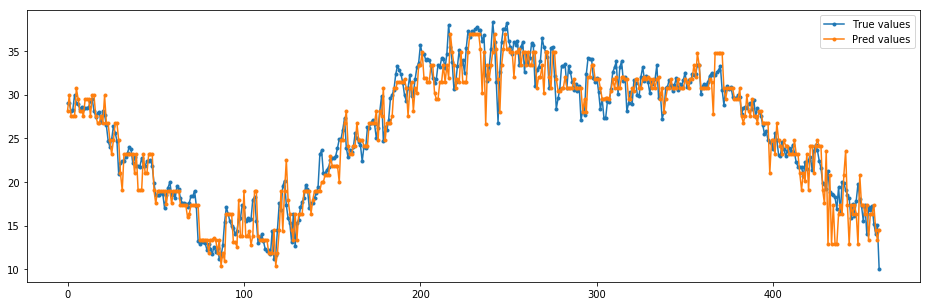

RMSE train=  2.0795329907238296
RMSE val=  2.080229589836194


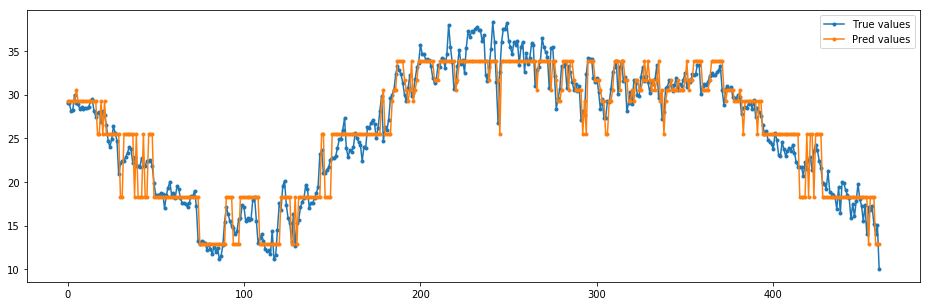

RMSE train=  2.6411258697150686
RMSE val=  2.542597343545757


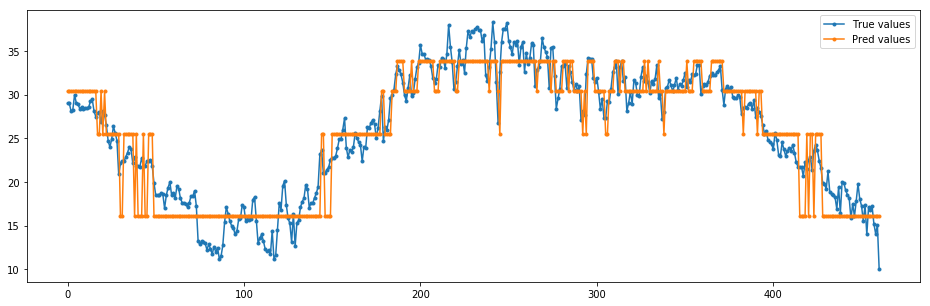

RMSE train=  2.8732430042395802
RMSE val=  2.875516249381713


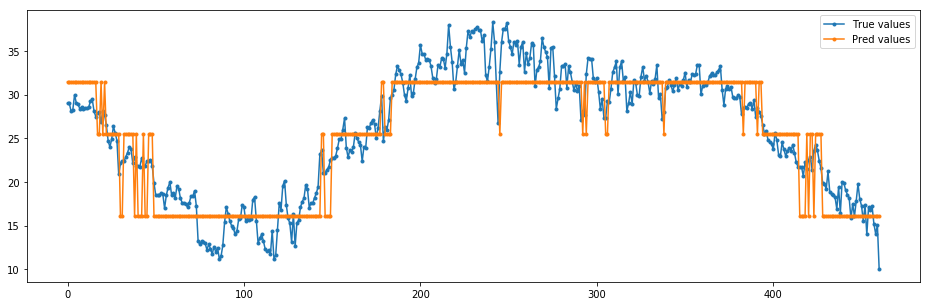

RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


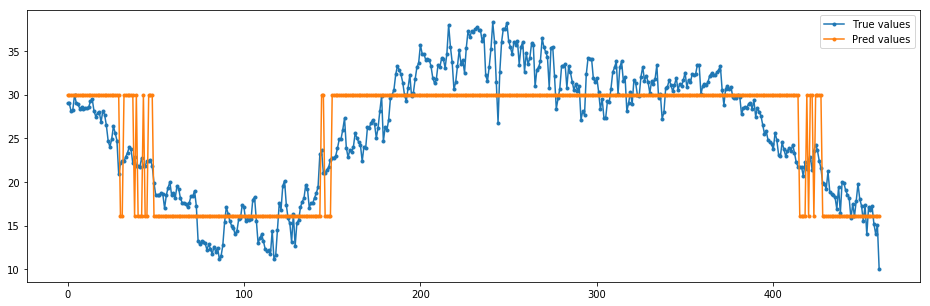

RMSE train=  0.9602809405376093
RMSE val=  2.2705181320513916


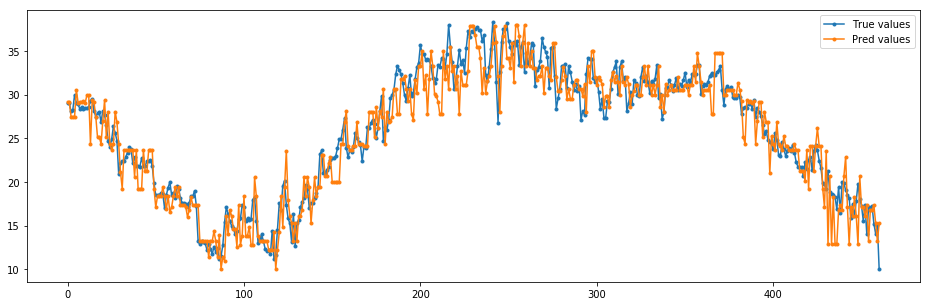

RMSE train=  2.0795329907238296
RMSE val=  2.0802295898361947


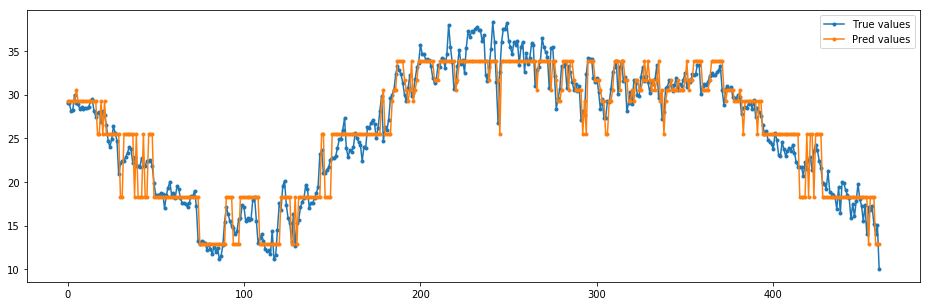

RMSE train=  2.6411258697150686
RMSE val=  2.542597343545757


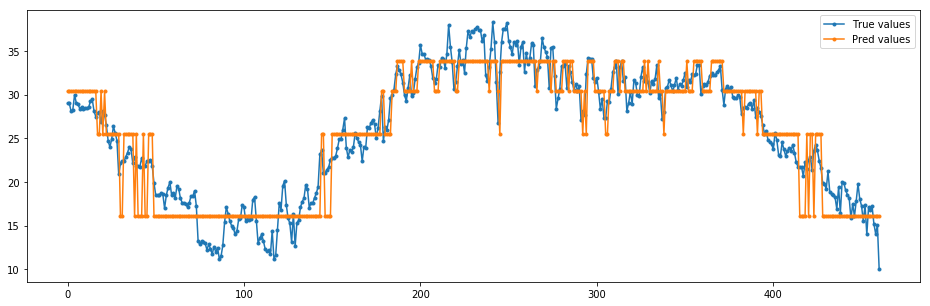

RMSE train=  2.8732430042395802
RMSE val=  2.87551624938171


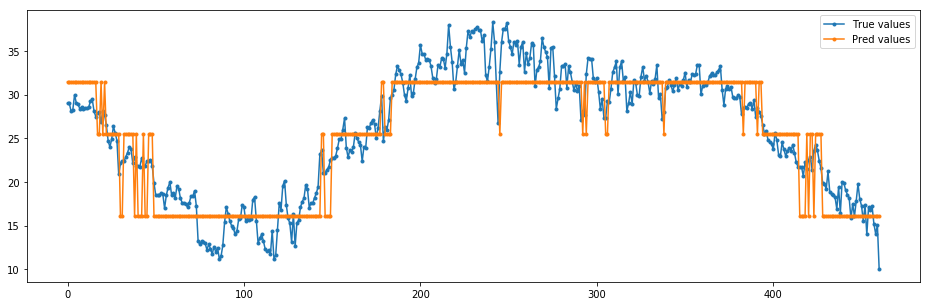

RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


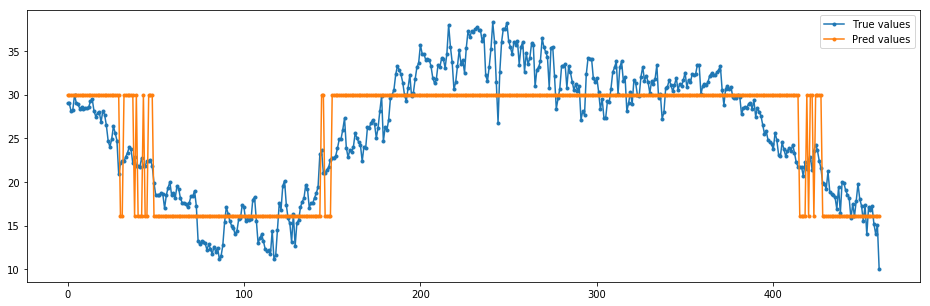

In [11]:
rmsetrain = []
rmseval = []

for modelo in models:
    y_train_hat = modelo.predict(X_train)
    y_val_hat = modelo.predict(X_val)
    
    print("RMSE train= ",RMSE(y_train,y_train_hat))
    print("RMSE val= ",RMSE(y_val,y_val_hat))
    
    rmsetrain.append(RMSE(y_train,y_train_hat))
    rmseval.append(RMSE(y_val,y_val_hat))
    
    plt.figure(figsize=(16,5))
    
    plt.plot(y_val, '.-' ,label="True values")
    plt.plot(y_val_hat, '.-' ,label="Pred values")
    plt.legend()
    plt.show()

    

In [12]:
for i in range(len(rmsetrain)):
    print("grafico", i+1 )
    print("RMSE train = ", rmsetrain[i])
    print("RMSE val = ", rmseval[i])
    print("--------------------------------------------------------------")

grafico 1
RMSE train =  3.567413761517928
RMSE val =  3.922173970900396
--------------------------------------------------------------
grafico 2
RMSE train =  3.567413761517928
RMSE val =  3.9221739709003955
--------------------------------------------------------------
grafico 3
RMSE train =  3.567413761517928
RMSE val =  3.922173970900396
--------------------------------------------------------------
grafico 4
RMSE train =  3.567413761517928
RMSE val =  3.9221739709003964
--------------------------------------------------------------
grafico 5
RMSE train =  3.567413761517928
RMSE val =  3.9221739709003955
--------------------------------------------------------------
grafico 6
RMSE train =  1.8860218948939758
RMSE val =  1.8547383542194988
--------------------------------------------------------------
grafico 7
RMSE train =  2.1468638280736316
RMSE val =  2.1380012259195724
--------------------------------------------------------------
grafico 8
RMSE train =  2.6411258697150686
RMSE 

Se realizaron 25 variaciones (por eso los 25 gráficos) de parámetros para el modelo de árbol regularizado.

En ningún caso se observa que el RMSE train del modelo regularizado sea mejor que el modelo no regularizado, pero si se observa que el RMSE val en algunos casos es menor. Por ejemplo en los gráfico 6, 7 16, 17, 21 y 22 se observa que el RMSE val es menor al del modelo no regularizado. 

De estos el que tiene menor RMSE val es el gráfico 6.

Pregunta d)

RMSE train=  0.7486033766164357
RMSE val=  1.7508753400338535


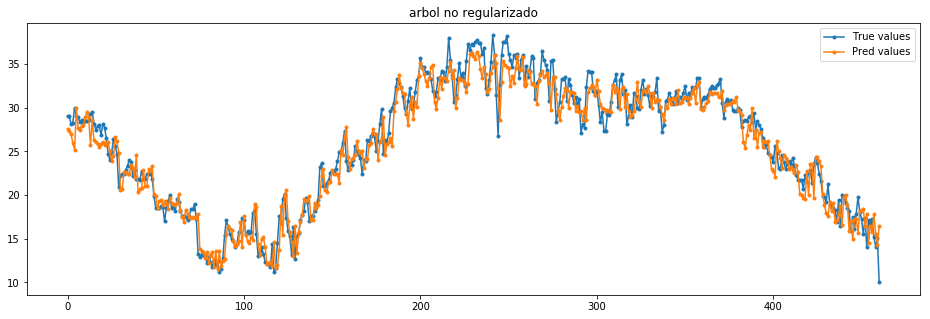

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE train=  1.6891752229520227
RMSE val=  1.6165237517054267


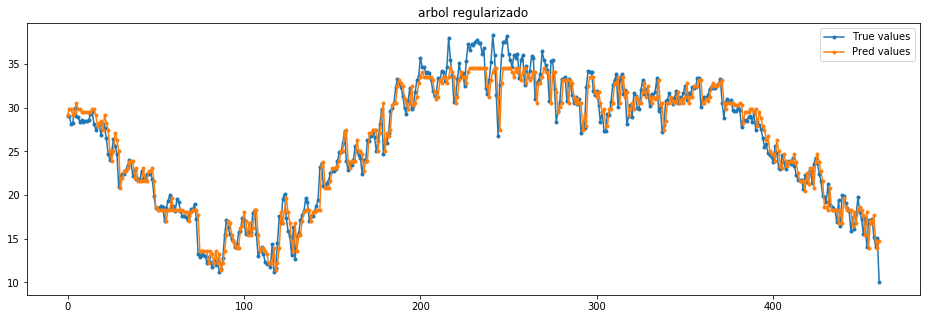

In [13]:
from sklearn.ensemble import BaggingRegressor


model = BaggingRegressor(base_estimator=Tree(), n_estimators=10, n_jobs=-1)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.title("arbol no regularizado")
plt.legend()
plt.show()



print(models[5])  #grafico 6


model = BaggingRegressor(base_estimator=Tree(max_depth = 3, min_samples_split = 2), n_estimators=10, n_jobs=-1)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.title("arbol regularizado")
plt.legend()
plt.show()

Al igual que en la pregunta anterior, con el modelo no regularizado se obtiene un mejor RMSE train (por mucha diferencia), mientras que con el árbol regularizado se obtiene un mejor RMSE val (por poca diferencia).

Se utilizan los parámetros del gráfico 6 de la pregunta anterior max_depth = 3 y min_samples_split = 2.

Del gráfico anterior, se observa que el RMSE puede aumentar cuando se ingresan los datos 200-300 (para el árbol regularizado), pero luego esto se regulariza por lo que se puede concluir que no existe overfitting, se obtienen mejores resultados mientras el número de estimadores sea mayor.

Pregunta e)

RMSE train=  0.23696352166716933
RMSE val=  1.8381955327042654


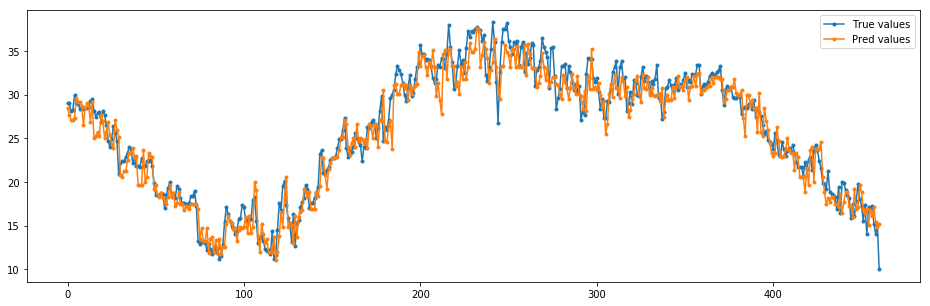

RMSE train=  1.7243243316397658
RMSE val=  1.7193313709542082


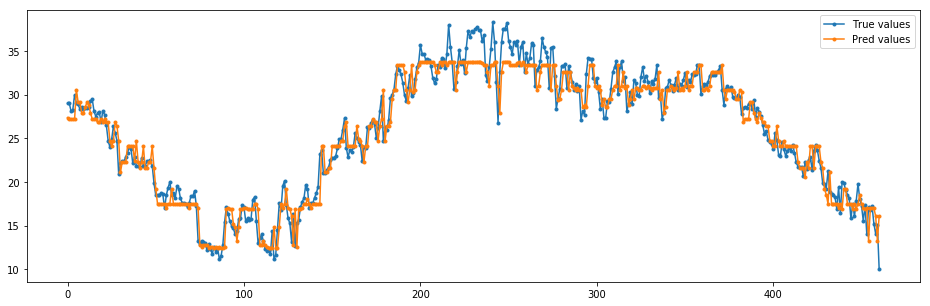

In [14]:
from sklearn.ensemble import AdaBoostRegressor


model = AdaBoostRegressor(base_estimator=Tree(), n_estimators=10)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()



model = AdaBoostRegressor(base_estimator=Tree(max_depth = 3, min_samples_split = 2), n_estimators=10)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

El árbol no regularizado tiene un RMSE train muy bajo (buen valor) y muy distante a lo que es el RMSE train del árbol regularizado. En cambio el RMSE val es mejor utilizando el árbol regularizado por poca diferencia.

Al igual que en la pregunta d), no se observa overfitting, ya que a medida que se incorporan más datos la diferencia entre valores reales y predichos no se ve aumentada.

sklearn, utiliza el re-muestreo y pesar ejemplos, ya que para AdaBoost, en el conjunto de datos original ajusta un regresor que añade copias adicionales del regresor al conjunto de datos pero donde los pesos de estas instancias se ajustan según el error de la predicción actual. Es más sensato utilizar el pesar ejemplos, ya que se les da mayor importancia a unos sobre otros.

Al hacer variar el n_estimators, no se observa un patrón de que si este aumenta, hay mas RMSE train o val, por lo que no se puede concluir nada respecto a este parámetro, respecto al tiempo de ejecución es mejor el de AdaBoostRegressor respecto a BaggingRegressor y los RMSE de AdaBoost no tienen mucha diferencia con los de Bagging, son resultados casi similares.

Pregunta f)

C:\Users\casa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RMSE train=  0.7507872323897478
RMSE val=  1.7691483153214806


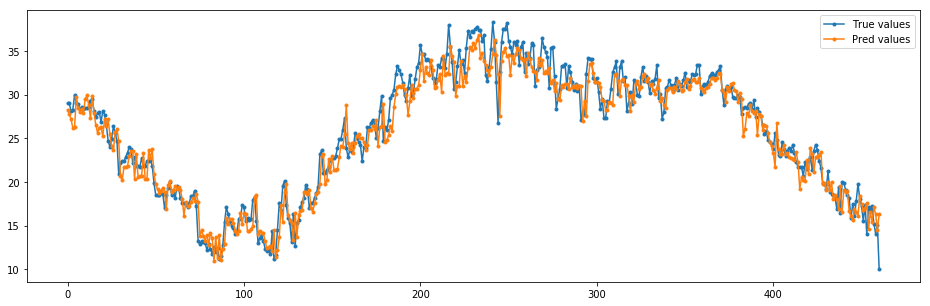

C:\Users\casa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RMSE train=  1.7441619967888087
RMSE val=  1.691851102824367


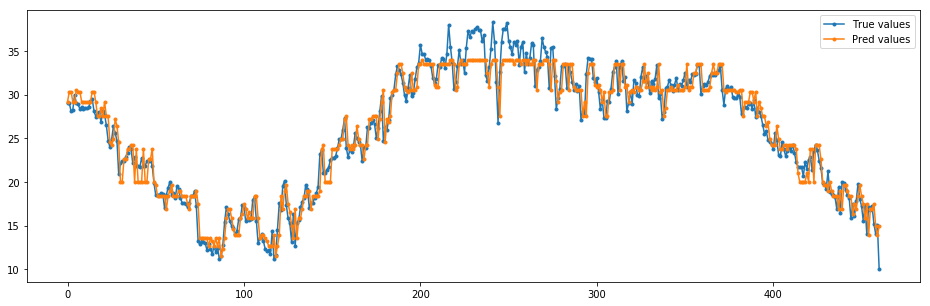

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, n_jobs=-1,oob_score = True)
... #define your regularized random forest model
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

model_unr = RandomForestRegressor(n_estimators=10, n_jobs=-1,max_depth = 3, min_samples_split = 2,oob_score = True)
... #define your regularized random forest model
model_unr.fit(X_train,y_train)
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

Similar a los casos anteriores el RMSE train del árbol no regularizado es mucho menor (mejor) que el que se obtuvó con el árbol regularizado, para el caso de RMSE val, luego de varias pruebas el que se obtuvó con el árbol regularizado resultó ser menor (no todas las veces, pero si en su mayoría) comparado al que se obtuvó con el árbol regularizado. No se visualiza overfitting por la misma razón que en los gráficos anteriores, solo en los datos que se incorporaron en los lugares 200-300 se observa que el valor predicho se aleja del valor real.

Pregunta g)

In [16]:
oob_error = model.oob_score_
val_error = model.score(X_val,y_val)
print("Modelo árbol no regularizado")
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

print('\n')

oob_error = model_unr.oob_score_
val_error = model_unr.score(X_val,y_val)
print("Modelo árbol regularizado")
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

Modelo árbol no regularizado
OOB error:  0.852523351671563
Val error:  0.9376527158918523


Modelo árbol regularizado
OOB error:  0.8962210171513709
Val error:  0.9429818225513262


El error OOB (out of bag error) si sirve como métrica de generalización, ya que el éste último es menor al error que se obtiene de validación, a pesar de que ambos son bajos ya que al observar los datos del problema (temperaturas medias), un error de esa magnitud da una sensación de que es bajo.

Pregunta h)

In [17]:
def minimo(y_val,valores):
    minimo = 1000
    for i in range(len(valores)):
        if (abs(y_val - valores[i])) < minimo:
            minimo = abs(y_val - valores[i])
            valor = valores[i]
    return valor

def combine_predictions(predictions):
    n = len(predictions)
    y_pred = []
    for i in range(len(y_val)):
        valores = []
        valores.append(predictions[0][i])
        valores.append(predictions[1][i])
        valores.append(predictions[2][i])
        valores.append(predictions[3][i])
        valores.append(predictions[4][i])
        valores.append(predictions[5][i])
        valores.append(predictions[6][i])
        valores.append(predictions[7][i])
        valores.append(predictions[8][i])
        valores.append(predictions[9][i])
        minim = minimo(y_val[i],valores)
        y_pred.append(minim)
    return y_pred
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)

print("RMSE val= ",RMSE(y_val, new_predictions))

RMSE val=  0.6998953744088936


In [18]:
for i in range(len(list_predictions)):
    print("RMSE val= ",RMSE(y_val, list_predictions[i]))

RMSE val=  2.6093904619766257
RMSE val=  2.352909693109833
RMSE val=  2.4143748951024797
RMSE val=  2.4564339919700777
RMSE val=  2.4812801328834384
RMSE val=  2.4978115337265
RMSE val=  2.2659490733717615
RMSE val=  2.635506299669655
RMSE val=  2.5532572511716847
RMSE val=  2.613286970074246


Se observa que al combinar las predicciones de cada estimador baja considerablemente el RSME val a 0.69, desde valores que abordaba desde 2.32 a 2.52

Pregunta i)

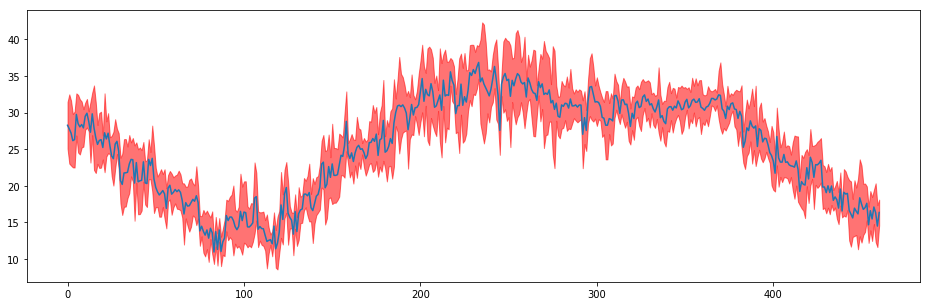

In [19]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(16,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

Como la distribución normal centra el dato, se puede desprender que el comportamiento de y_val es normal, ya que la mayoría de los datos se encuentran en la parte media de la frontera roja, es decir la mayoría de la línea azul está dentro de la frontera roja y casi centrada en ésta.

Pregunta j)

In [20]:

df = pd.read_csv("DailyDelhiClimateTest.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

In [21]:
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]

n_zero = np.zeros(113,dtype=int)
df["season_fall"] = n_zero
df["season_rainy"] = n_zero
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

df


,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,15.913043,85.869565,2.743478,59.000000,18.500000,6,2017,1,0,0,0,1
1,18.500000,77.222222,2.894444,1018.277778,17.111111,0,2017,1,0,0,0,1
2,17.111111,81.888889,4.016667,1018.333333,18.700000,1,2017,1,0,0,0,1
3,18.700000,70.050000,4.545000,1015.700000,18.388889,2,2017,1,0,0,0,1
4,18.388889,74.944444,3.300000,1014.333333,19.318182,3,2017,1,0,0,0,1
5,19.318182,79.318182,8.681818,1011.772727,14.708333,4,2017,1,0,0,0,1
6,14.708333,95.833333,10.041667,1011.375000,15.684211,5,2017,1,0,0,0,1
7,15.684211,83.526316,1.950000,1015.550000,14.571429,6,2017,1,0,0,0,1
8,14.571429,80.809524,6.542857,1015.952381,12.111111,0,2017,1,0,0,0,1
9,12.111111,71.944444,9.361111,1016.888889,11.000000,1,2017,1,0,0,0,1


In [22]:

y_test = df.pop("y_value").values  
X_test = df.values 




De los resultados obtenidos anteriormente, se escoge como mejor modelo el de la pregunta e) AdaBoostRegressor

RMSE test = 1.750056325708602


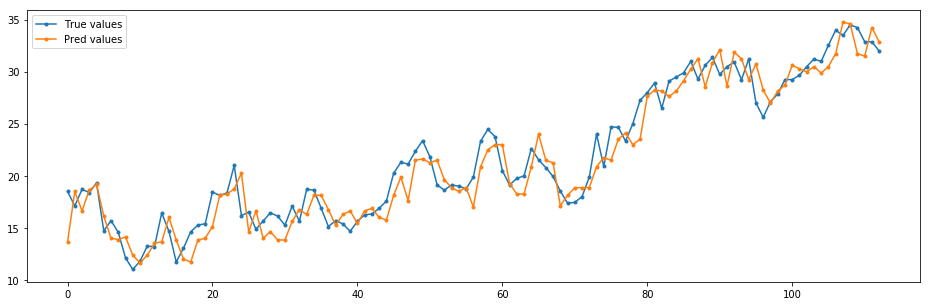

In [23]:
model = AdaBoostRegressor(base_estimator=Tree(), n_estimators=10)
model.fit(X_train,y_train)
#y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
#print("RMSE train= ",RMSE(y_train,y_train_hat))
#print("RMSE val= ",RMSE(y_val,y_val_hat))
print("RMSE test =", RMSE(y_test,y_test_hat))
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(y_test, '.-' ,label="True values")
plt.plot(y_test_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

Se obtuvo un error que va del rango de 1.8 a 2.0 para el conjunto de pruebas, valor similar al que se obtuvo con el conjunto de validación utilizando el mismo modelo (AdaBoostRegressor)

El problema fue abordado por modelos de ensamblado de árboles de múltiples niveles regularizados o no regularizados. Se observo que utilizando los árboles no regularizados, se obtenían mejores valores para el RMSE train y para el RMSE val eran valores similares al del árbol regularizado.

Pregunta 2)

In [50]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD


data_train = pd.read_csv("Train_data.csv")
data_test = pd.read_csv("Test_input.csv")

y_train = data_train.pop("harassment").values
X_train = data_train.values

X_test = data_test.values

text_train = data_train.pop("tweet_content").values
text_test =  data_test.pop("tweet_content").values


def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor(text) for text in text_train]
texts_test = [word_extractor(text) for text in text_test]




In [51]:
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

model = TruncatedSVD(n_components=2)
model.fit(features_train)



TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [57]:
from  sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt


model_unr = AdaBoostRegressor(base_estimator=Tree(), n_estimators=10)
model_unr.fit(features_train,y_train)


y_train_hat = model_unr.predict(features_train)
y_test_hat = model_unr.predict(features_test)

y_train_hat = y_train_hat.round()
y_test_hat = y_test_hat.round()


f1_score(y_train, y_train_hat, average='binary')


Depths = np.arange(1, X_train.shape[1], 2 ) #choose steps   
SamplesS = np.arange(2, X_train.shape[0] , 200 ) #choose steps

models = []

for d in Depths:
    for s in SamplesS:
        model_reg = AdaBoostRegressor(base_estimator=Tree(max_depth = d, min_samples_split = s), n_estimators=10)
        model_reg.fit(features_train,y_train)
        models.append(model_reg)
        
for i in models:
    y_train_hat = i.predict(features_train)
    y_test_hat = i.predict(features_test)
    

    print("Model", i)
    print(f1_score(y_train, y_train_hat.round(), average='binary'))
          
    #plt.figure(figsize=(16,5))
    #plt.plot(y_train, '.-' ,label="True values")
    #plt.plot(y_train_hat.round(), '.-' ,label="Pred values")
    #plt.legend()
    #plt.show()
    

Model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=10,
         random_state=None)
0.4314994606256742
Model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=202, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=10,
         random_state=None)
0.0
Model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_feat

C:\Users\casa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\casa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\casa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\casa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\casa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetri

0.4314994606256742
Model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4402, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=10,
         random_state=None)
0.4314994606256742
Model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4602, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=10,
         random_state=None)
0.4314994606256742
Model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(

C:\Users\casa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.45222929936305734
Model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=802, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=10,
         random_state=None)
0.47230929989550685
Model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=1002, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=10,
         random_state=None)
0.08650519031141869
Model AdaBoostRegressor(base_estimator=DecisionTreeRegresso




Con el modelo, utilizando max_depth = 3 y min_samples_split = 5202 (con AdaBoostRegressor), se obtuvo el mejor resultado el cual fue de 0.47, un valor bajo.

In [68]:
model1 = AdaBoostRegressor(base_estimator=Tree(max_depth = 3, min_samples_split = 5202), n_estimators=10)
model1.fit(features_train,y_train)
y_train_hat = model1.predict(features_train)
y_train_hat = y_train_hat.round()
y_test_hat = model1.predict(features_test)
y_test_hat = y_test_hat.round()
l = []
for i in range(1785):
    l.append(i)


    
    
data = pd.DataFrame(
    {   'id': l,
        'harassment': y_test_hat,
    })

data.to_csv('archivo.csv',index=False)


In [69]:
print(data)

      harassment    id
0            0.0     0
1            0.0     1
2            0.0     2
3            0.0     3
4            0.0     4
5            0.0     5
6            0.0     6
7            0.0     7
8            0.0     8
9            0.0     9
10           0.0    10
11           0.0    11
12           0.0    12
13           0.0    13
14           0.0    14
15           0.0    15
16           0.0    16
17           0.0    17
18           0.0    18
19           0.0    19
20           0.0    20
21           0.0    21
22           0.0    22
23           0.0    23
24           0.0    24
25           0.0    25
26           0.0    26
27           0.0    27
28           0.0    28
29           0.0    29
...          ...   ...
1755         0.0  1755
1756         0.0  1756
1757         0.0  1757
1758         0.0  1758
1759         0.0  1759
1760         0.0  1760
1761         0.0  1761
1762         0.0  1762
1763         0.0  1763
1764         0.0  1764
1765         0.0  1765
1766       